In [47]:
# Install a pip package in the current Jupyter kernel

# importing libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import missingno

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [48]:
# importing the dataset
df = pd.read_csv('titanic.csv')

# Dsiplay first five rows to confirm the data has been properly read
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<AxesSubplot:>

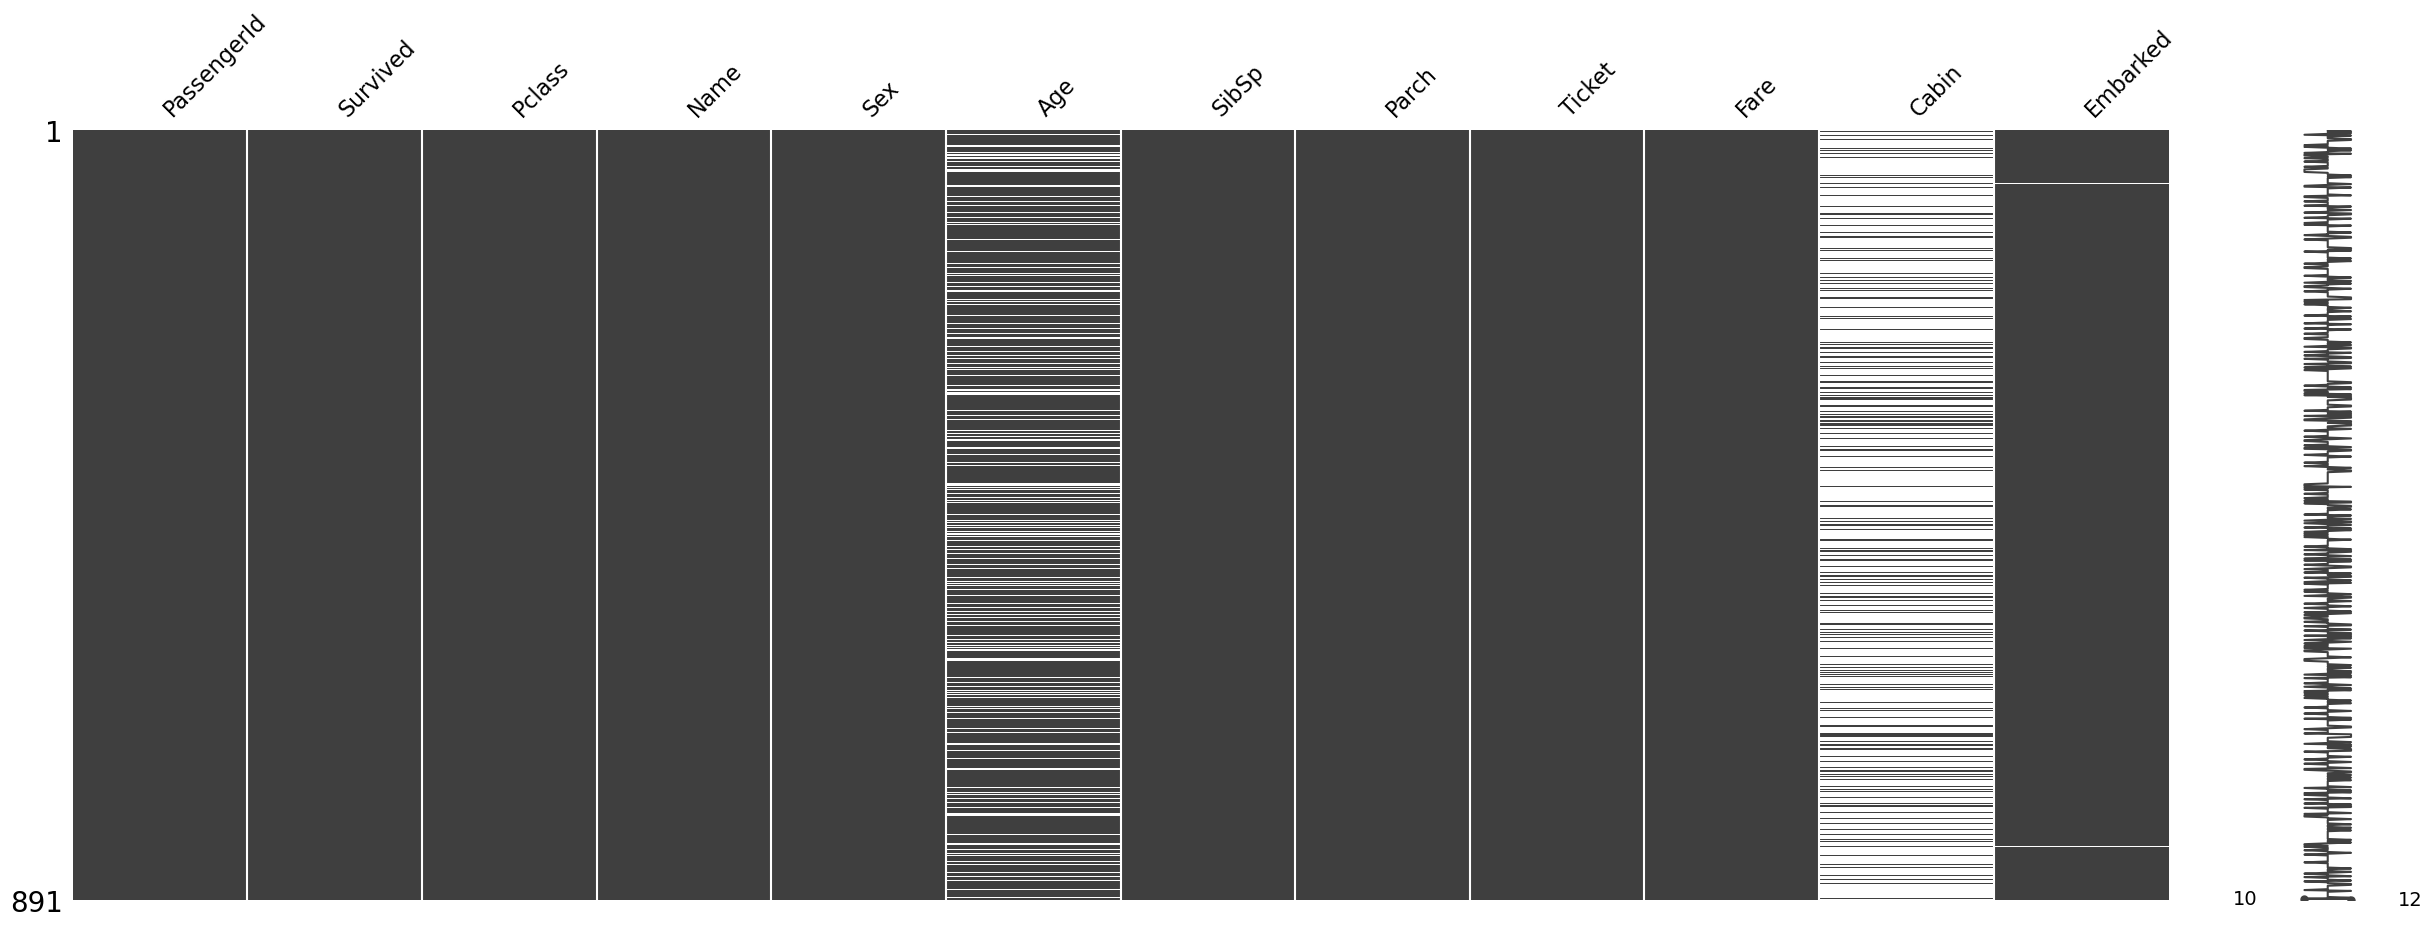

In [49]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

In [50]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all the columns
print(missing_values_count)

# Check total amount of rows in the data
rows = len(df.axes[0])
print(f"Total amount of rows: {rows}")

# Get the list of all column names from headers
column_headers = list(df.columns.values)

# Calculate percentage of missing data
print('')
print("The percentage of missing data from each category is:")
n = 0
print
for data in missing_values_count:
    percentage = (data/rows) * 100
    print(f"{column_headers[n]} has {round(percentage, 2)}% of missing data")
    n += 1

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total amount of rows: 891

The percentage of missing data from each category is:
PassengerId has 0.0% of missing data
Survived has 0.0% of missing data
Pclass has 0.0% of missing data
Name has 0.0% of missing data
Sex has 0.0% of missing data
Age has 19.87% of missing data
SibSp has 0.0% of missing data
Parch has 0.0% of missing data
Ticket has 0.0% of missing data
Fare has 0.0% of missing data
Cabin has 77.1% of missing data
Embarked has 0.22% of missing data


In [51]:
# Remove the cabin data
df.drop(['Cabin'], inplace = True, axis=1)
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  
0        0         A/5 21171   7.2500        S  
1        0          PC 17599  71.2833        C  
2        0  STON/O2. 3101282   7.9250        S  
3        0            113803  53.1000        S  
4        0            373450   8.0500        S  
..     ...               ...      ...      ...  
886      0            211536  13.0000        S  
887      0            112053  30.0000        S  
888      2        W./C. 6607  23.4500        S  
889      0            111369  30.0000        C  
890      0            370376   7.7500        Q  

[891 rows x 11 columns]

In [52]:
# Replace all missing age values in Age column with a '?'
df = df.replace(np.NaN,'?')

# Replace missing age with the mean of the column
# Create temorary dataframe that contains the age column without the '?' values
temp_df = df[df['Age']!= '?']
mean = temp_df['Age'].astype(int).mean()  #Determine mean of column
print(f'The mean was determined to be: {mean}')
df['Age'] = df['Age'].replace('?', mean).astype(int)
df.head()

The mean was determined to be: 29.679271708683473


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [54]:
# Convert "male" to 1 and "female" to 0
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0   38      1      0   
2                             Heikkinen, Miss. Laina    0   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0   35      1      0   
4                           Allen, Mr. William Henry    1   35      0      0   

             Ticket     Fare Embarked  
0         A/5 21171   7.2500        S  
1          PC 17599  71.2833        C  
2  STON/O2. 3101282   7.9250        S  
3            113803  53.1000        S  
4            373450   8.0500        S

<AxesSubplot:>

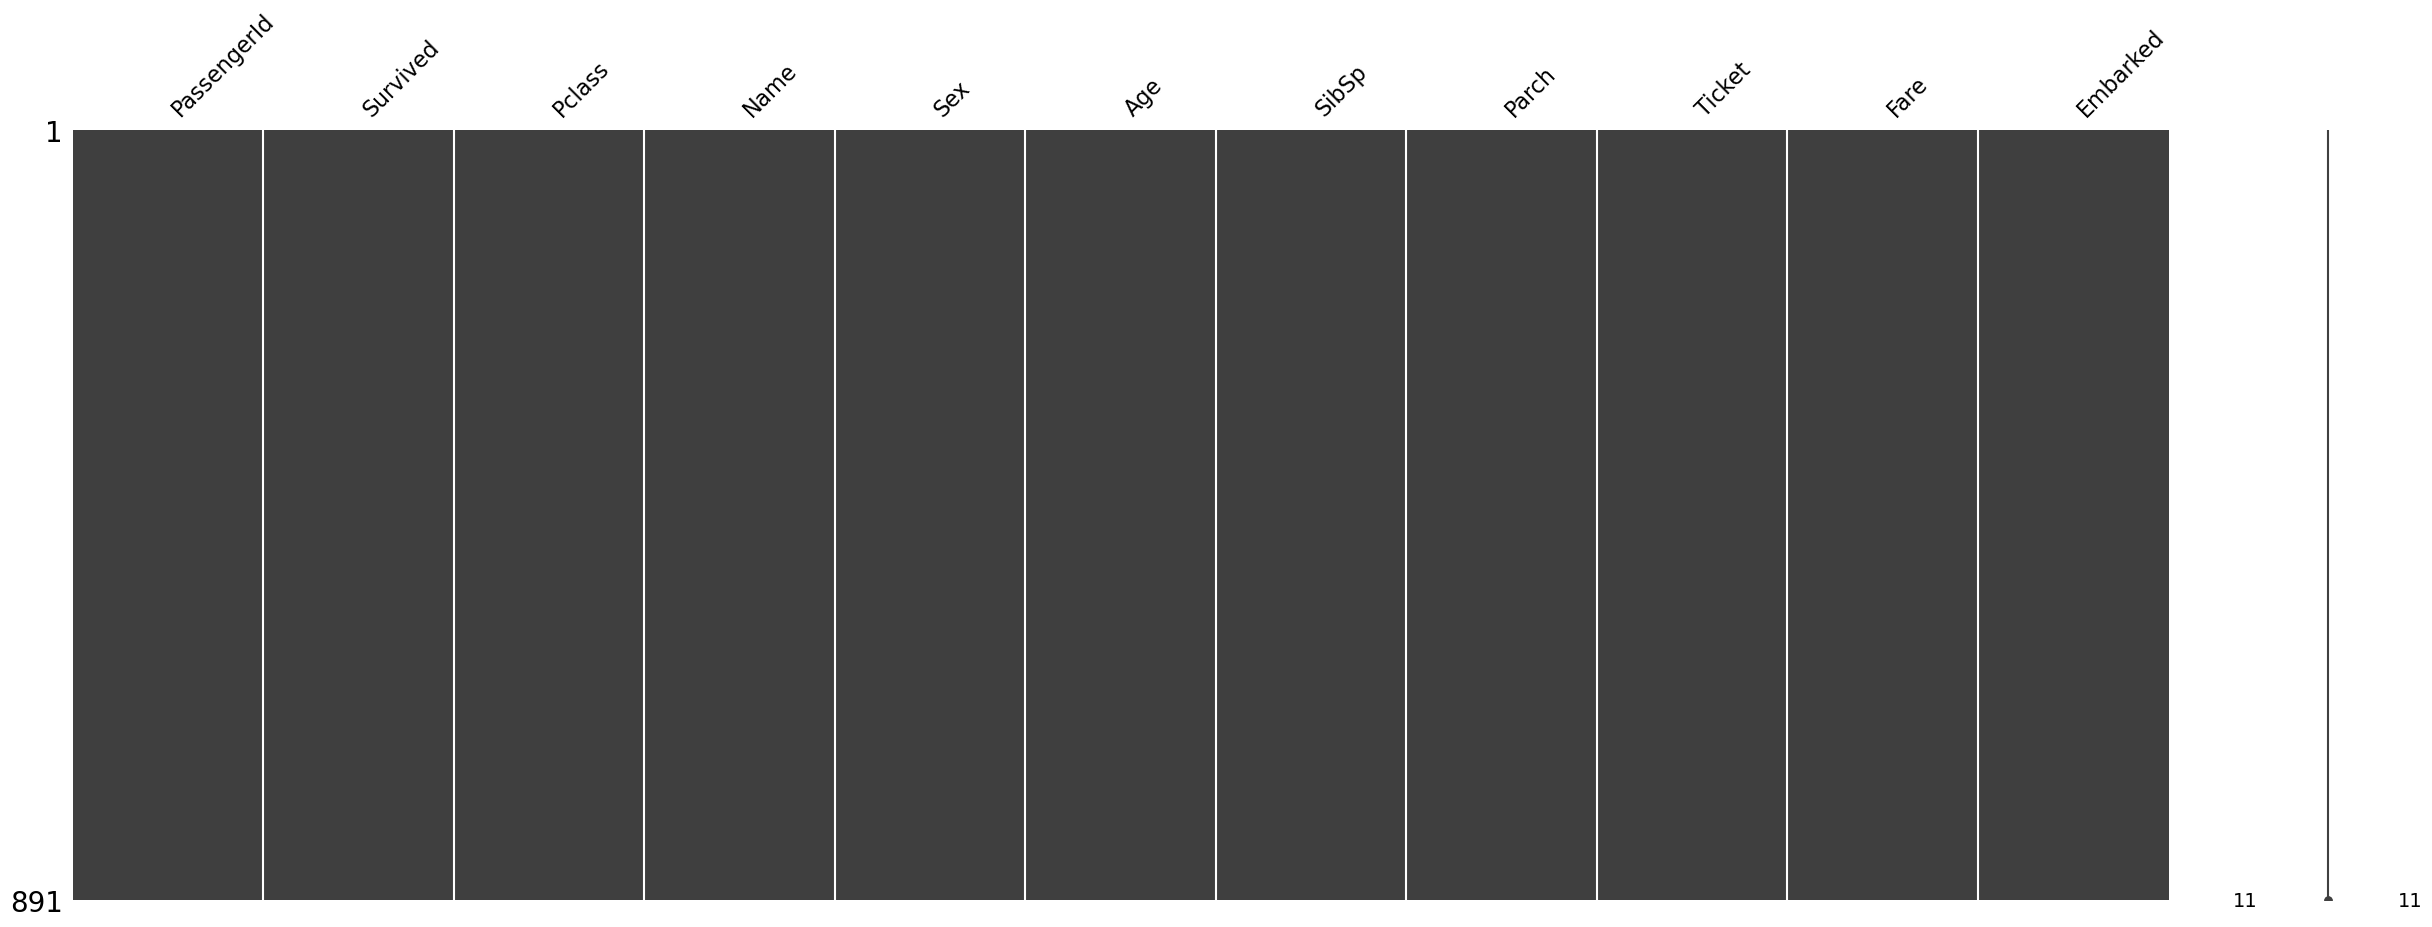

In [55]:
# Check the age data with the missingno matrix
missingno.matrix(df, figsize = (30,10))

In [56]:
# Assign independant variables
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']].values
# Print 5 lines of x data
print(X[:5])

# Assign dependant variable
y = df['Survived'].values
# Print first 5 lines of y data
print(y[:5])

[[ 3.      1.     22.      1.      7.25  ]
 [ 1.      0.     38.      1.     71.2833]
 [ 3.      0.     26.      0.      7.925 ]
 [ 1.      0.     35.      1.     53.1   ]
 [ 3.      1.     35.      0.      8.05  ]]
[0 1 1 1 0]


In [57]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 4)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (534, 5)
X_test shape: (179, 5)
y_train shape: (534,)
y_test shape: (179,)
X_val shape: (534,)
y val shape: (179,)


Performance without pruning on the development/validation set: 0.8258426966292135
Performance without pruning on the training set: 0.9794007490636704
At depth: 20


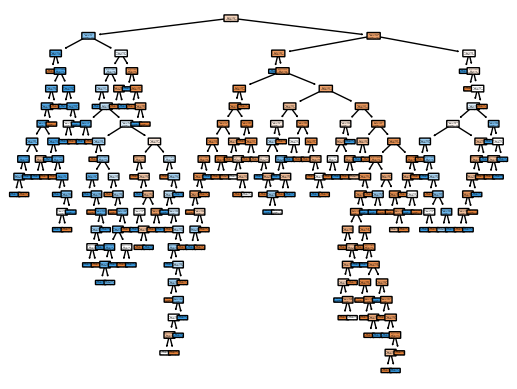

In [73]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=4)
unpruned.fit(X_train, y_train)

# Test the accruacy on the development/validation data
val_accuracy_1 = unpruned.score(X_val, y_val)
train_accuracy_1 = unpruned.score(X_train, y_train)
print("Performance without pruning on the development/validation set:", val_accuracy_1)
print("Performance without pruning on the training set:", train_accuracy_1)
print("At depth:", unpruned.tree_.max_depth)
fig = plt.figure()
tree.plot_tree(unpruned, rounded = True, proportion = False, precision = 2, filled = True) #display tree
plt.show()

Performance on the development/validation set with max_depth = 5: 0.8033707865168539
Performance on the training set with max_depth = 5: 0.8239700374531835
At depth: 5


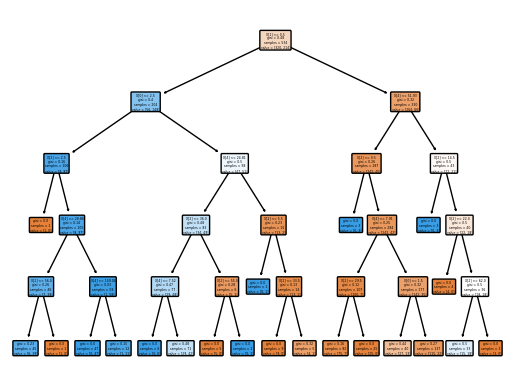

In [74]:
# training a model at max_depth of 5
pruned_5 = DecisionTreeClassifier(max_depth=5, random_state=4)
pruned_5.fit(X_train, y_train)

# Test the accruacy on the development/validation data
val_accuracy_2 = pruned_5.score(X_val, y_val)
train_accuracy_2 = pruned_5.score(X_train, y_train)
print("Performance on the development/validation set with max_depth = 5:", val_accuracy_2)
print("Performance on the training set with max_depth = 5:", train_accuracy_2)
print("At depth:", pruned_5.tree_.max_depth)
fig = plt.figure()
tree.plot_tree(pruned_5, rounded = True, proportion = False, precision = 2, filled = True) #display tree
plt.show()

Performance on the development/validation set with max_depth = 2: 0.8089887640449438
Performance on the training set with max_depth = 2: 0.7715355805243446
At depth: 2


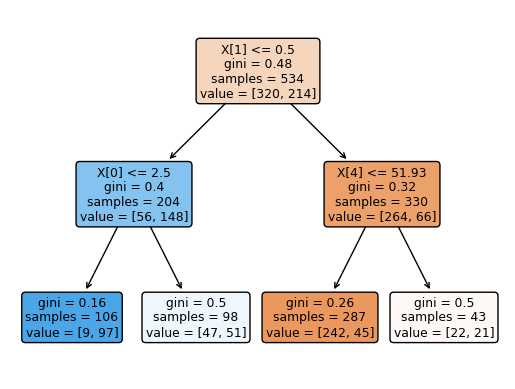

In [83]:
# training a model at max_depth of 2
pruned_2 = DecisionTreeClassifier(max_depth=2, random_state=4)
pruned_2.fit(X_train, y_train)

# Test the accruacy on the development/validation data
val_accuracy_3 = pruned_2.score(X_val, y_val)
train_accuracy_3 = pruned_2.score(X_train, y_train)
print("Performance on the development/validation set with max_depth = 2:", val_accuracy_3)
print("Performance on the training set with max_depth = 2:", train_accuracy_3)
print("At depth:", pruned_2.tree_.max_depth)
fig = plt.figure()
tree.plot_tree(pruned_2, rounded = True, proportion = False, precision = 2, filled = True) #display tree
plt.show()

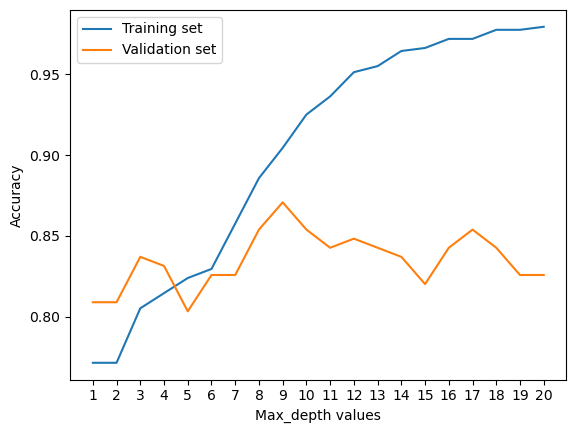

In [80]:
# Plot a line of your training accuracies and another of your development accuracies in the same graph
# looking at effect of pruning   
pruned_depths = range(1,unpruned.tree_.max_depth+1)

# Loop through the range of max_depth and determine the scores/accuracy at each value of max_depth
pruned_scores_train = [] 
pruned_scores_val = [] 
for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=4)
    clf.fit(X_train, y_train)
    # Determine the accuracy scores
    score_train = clf.score(X_train, y_train)
    score_val = clf.score(X_val, y_val)
    # Save the accuracy score for the training data and validation data to seperate lists
    pruned_scores_train.append(score_train)
    pruned_scores_val.append(score_val)

# Plot the accuracy of the training data and the validation data
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train, label = 'Training set')
ax.plot(pruned_depths, pruned_scores_val, label = 'Validation set')
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.legend(loc="upper left")
plt.show()

It can be seen from the graph that the training data creat an exponential graph that levels out from a max-depth of 13 more or less which means it is dminishing returns in accuracy after a max_depth of 13.

Regarding the validation set it can be seen that the maximum accuracy is achieved after a max_depth of 9 where a decrease in accuracy is seen at higher max_depth values.

Based on the graph a max_depth of 9 was chosen to prune the decision tree

Performance on the development/validation set: 0.8707865168539326
Performance on the training set: 0.9044943820224719
At depth: 9


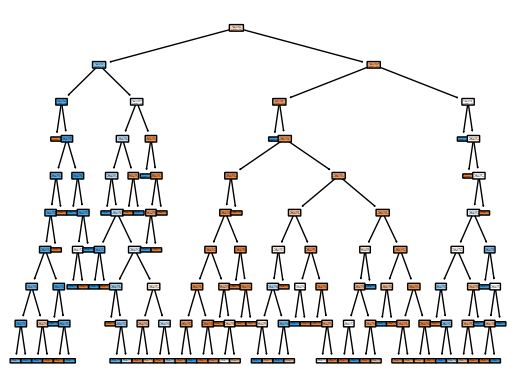

In [84]:
# training a model at the chosen max_depth
pruned = DecisionTreeClassifier(max_depth=9, random_state=4)
pruned.fit(X_train, y_train)

# Test the accruacy on the development/validation data
val_accuracy = pruned.score(X_val, y_val)
train_accuracy = pruned.score(X_train, y_train)
print("Performance on the development/validation set:", val_accuracy)
print("Performance on the training set:", train_accuracy)
print("At depth:", pruned.tree_.max_depth)
fig = plt.figure()
tree.plot_tree(pruned, rounded = True, proportion = False, precision = 2, filled = True) #display tree
plt.show()

In [85]:
# Determine accuracy of model based on testing set of data
test_accuracy = pruned.score(X_test, y_test)
print("Performance on the testing set:", test_accuracy)

Performance on the testing set: 0.8324022346368715
